<a href="https://colab.research.google.com/github/keerthesh-kumar/ChestXRay_Image_Classification_Heroku_Deployment/blob/main/ChestXRay_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls "/content/drive/My Drive/DeepLearning/Chest_Xray"

ChestXRay  ChestXRay_Custom.ipynb  ChestXRay_VGG16.ipynb


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.layers import BatchNormalization
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix

import time
import shutil
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
classifier = Sequential()

# Adding a first convolutional layer with Max pooling
classifier.add(Conv2D(64, 3, 3, padding = 'same', activation = 'relu', input_shape = (64, 64, 3))),
classifier.add(MaxPool2D(pool_size = (2, 2), padding='same', strides=(2, 2))),
classifier.add(Dropout(0.5))

# Adding a second convolutional layer with Max pooling
classifier.add(Conv2D(32, 5, 5, padding = 'same', activation = 'relu')),
classifier.add(MaxPool2D(pool_size = (2, 2), padding='same', strides=(2, 2))),
classifier.add(BatchNormalization())

# Adding a third convolutional layer with Max pooling
classifier.add(Conv2D(32, 7, 7, padding = 'same', activation = 'relu')),
classifier.add(MaxPool2D(pool_size = (2, 2), padding='same', strides=(2, 2))),
classifier.add(Dropout(0.5))

# Adding a fourth convolutional layer with Max pooling
classifier.add(Conv2D(16, 11, 11, padding = 'same', activation = 'relu')),
classifier.add(MaxPool2D(pool_size = (2, 2), padding='same', strides=(2, 2))),
classifier.add(BatchNormalization())

# Adding a fifth convolutional layer with Max pooling
classifier.add(Conv2D(32, 3, 3, padding = 'same', activation = 'relu')),
classifier.add(MaxPool2D(pool_size = (2, 2), padding='same', strides=(2, 2))),
classifier.add(Dropout(0.5))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection layer with sigmoid
classifier.add(Dense(32, activation = 'relu'))
classifier.add(Dense(2, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 22, 22, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 32)          51232     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 2, 2, 32)          128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 1, 32)         

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   rotation_range=15,
                                   vertical_flip=True,
                                   fill_mode='reflect',
                                   data_format='channels_last',
                                   brightness_range=[0.5, 1.5],
                                   featurewise_center=True,
                                   featurewise_std_normalization=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 classes=['NORMAL','PNEUMONIA'])

val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes=['NORMAL','PNEUMONIA'])

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            classes=['NORMAL','PNEUMONIA'])

Found 5216 images belonging to 2 classes.
Found 14 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# mapping the labels of the training set
label_map = (training_set.class_indices)
reversed_label_map = {value : key for (key, value) in label_map.items()} # reversing the dictionary key and value pairs
print(reversed_label_map)
print(label_map)

{0: 'NORMAL', 1: 'PNEUMONIA'}
{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
imgs, labels = next(training_set)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
# functions to plot the images that we stored in the folder
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

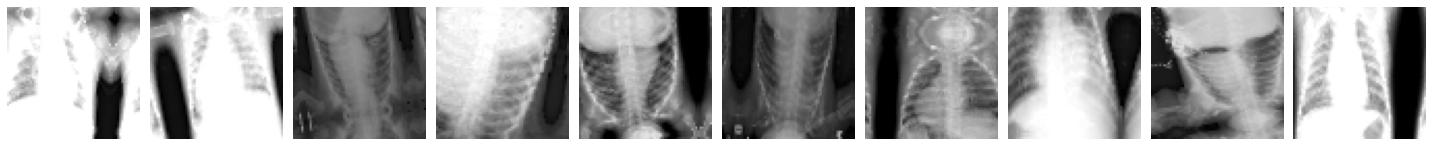

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
# Running the model using two method, the fit_generator as well as the fit method
# classifier.fit_generator(training_set,
#                     steps_per_epoch = 32,
#                     epochs = 100,
#                     validation_data = test_set)

classifier.fit(x=training_set, validation_data=test_set, epochs=500, verbose=1)

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f83faddd8c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 69/500
 11/163 [=>............................] - ETA: 1:22 - loss: 0.3196 - accuracy: 0.8636

In [ ]:
# saving the model to a h5 file for later use
classifier.save('/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/models/CustomModel_Epoch500.h5')

### Predicting the Images

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


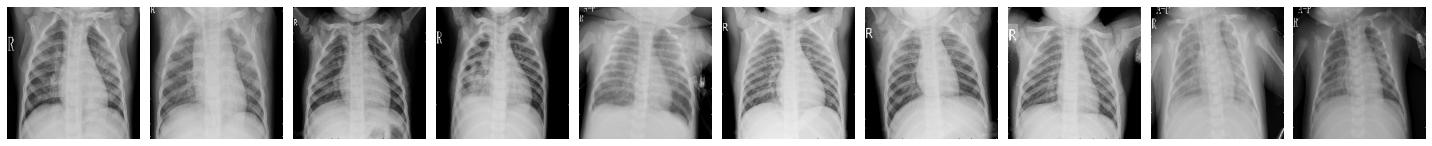

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [ ]:
val_imgs, val_lables = next(val_set)
plotImages(val_imgs)
print(val_lables)

In [ ]:
print(val_imgs.shape)

(14, 224, 224, 3)


In [ ]:
val_set.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/models/KerasModel2.h5')

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                73760     
_________________________________________________________________
dense_13 (Dense)             (None, 2)                

In [ ]:
predictions = model.predict(x=val_set, verbose=0)

In [ ]:
import numpy as np
np.round(predictions)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
from keras.preprocessing import image
def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    print(x.shape)
    x = np.true_divide(x, 255)
    x = np.expand_dims(x, axis=0)
    print(x.shape)

    preds  = (model.predict(x) > 0.5).astype("int32")
    classes_names = ['NORMAL', 'PNEUMONIA']
    pred_class = classes_names[np.argmax(preds)]
    return pred_class

In [ ]:
normalPred = '/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/predict_image/Normal.jpeg'
pneumoniaPred = '/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/predict_image/Pneumonia.jpeg'

normalPredPath = '/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/predict_image/'
pneumoniaPred = '/content/drive/MyDrive/DeepLearning/Chest_Xray/ChestXRay/predict_image/Pneumonia.jpeg'

In [ ]:
preds = model_predict(normalPred,model)

(224, 224, 3)
(1, 224, 224, 3)


In [ ]:
print(preds)